# SIR models

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
%matplotlib inline

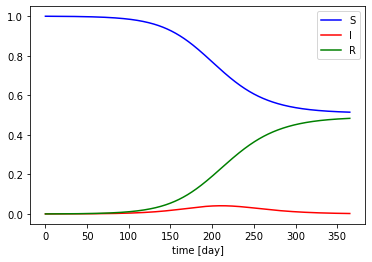

In [7]:
alpha = 0.125
beta = 1./11. #reciprocal of infectious period
t = np.linspace(0,1*365,1001) #one year time period 
pop = 7000 #population size

def SIRmodel(t,y):
    S, I, R = y
    return ([-alpha*S*I,alpha*S*I-beta*I,beta*I])

initinfected = 1.
Iinit = initinfected/pop
Sinit = (pop - initinfected)/pop 
Rinit = 0.

sol = solve_ivp(SIRmodel,[t[0],t[-1]],[Sinit,Iinit,Rinit],dense_output=True)

plt.plot(t,sol.sol(t)[0],'b',t,sol.sol(t)[1],'r',t,sol.sol(t)[2],'g');
plt.xlabel('time [day]');
plt.legend(['S','I','R']);

In [11]:

def MC_SIR():
    Nsims = 10000
    Imax = np.zeros(Nsims)
    for sim in range(Nsims):
        alpha = max(0.,np.random.normal(0.15,0.01))
        beta = 1./11. #reciprocal of infectious period
        t = np.linspace(0,1*365,1001) #one year time period 
        pop = 7000 #population size

        def SIRmodel(t,y):
            S, I, R = y
            return ([-alpha*S*I,alpha*S*I-beta*I,beta*I])

        initinfected = 1.
        Iinit = initinfected/pop
        Sinit = (pop - initinfected)/pop 
        Rinit = 0.

        sol = solve_ivp(SIRmodel,[t[0],t[-1]],[Sinit,Iinit,Rinit],dense_output=True)

        Imax[sim] = max(sol.sol(t)[1])
    
    return(Imax)
            



In [12]:
Imax = MC_SIR()


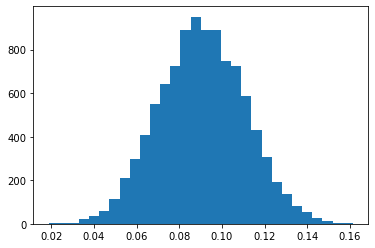

In [14]:
plt.hist(Imax,bins=30);

In [15]:
print(np.mean(Imax),np.std(Imax))

0.09067544587010995 0.02009445980105731
